In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets

In [6]:
from utils import Transforms, show_batch, misclassified
from models.resnet import ResNet18
from main import train, test

In [ ]:
%pip install torchsummary
from torchsummary import summary

In [ ]:
train_data = Transforms(datasets.CIFAR10('./data', train=True, download=True), Train=True)
test_data = Transforms(datasets.CIFAR10('./data', train=False, download=True), Train=False)

In [ ]:
SEED = 11

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [ ]:
show_batch(train_loader)

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,728
       BatchNorm2d-2           [-1, 64, 30, 30]             128
              ReLU-3           [-1, 64, 30, 30]               0
            Conv2d-4           [-1, 64, 30, 30]          36,928
       BatchNorm2d-5           [-1, 64, 30, 30]             128
              ReLU-6           [-1, 64, 30, 30]               0
            Conv2d-7           [-1, 64, 30, 30]          36,928
       BatchNorm2d-8           [-1, 64, 30, 30]             128
              ReLU-9           [-1, 64, 30, 30]               0
        ResBlocks-10           [-1, 64, 30, 30]               0
           Conv2d-11           [-1, 64, 30, 30]          36,928
      BatchNorm2d-12           [-1, 64, 30, 30]             128
             ReLU-13           [-1, 64, 30, 30]               0
           Conv2d-14           [-1,

In [40]:
%pip install torch_lr_finder 
from torch_lr_finder import LRFinder

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.33E-03


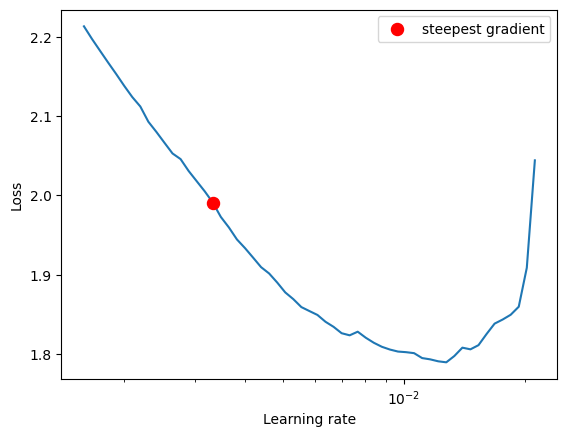

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")

lr_finder.plot()
lr_finder.reset()

In [44]:
lr = 3.33e-3
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,steps_per_epoch=len(train_loader), epochs=20,pct_start=0.2,div_factor=10, three_phase=False, final_div_factor=10, anneal_strategy='linear')

In [45]:
EPOCHS = 20
for epoch in range(EPOCHS):

    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, optimizer, epoch, scheduler)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.3069665431976318 LR=0.0010841662404092072 Batch_id=97 Accuracy=43.58: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s] 



Test set: Average loss: 0.0000, Accuracy: 4762/10000 (47.62%)

EPOCH: 2


Loss=1.1117793321609497 LR=0.0018353324808184142 Batch_id=97 Accuracy=58.75: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]



Test set: Average loss: 0.0000, Accuracy: 5414/10000 (54.14%)

EPOCH: 3


Loss=0.9940584897994995 LR=0.0025864987212276215 Batch_id=97 Accuracy=65.00: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]



Test set: Average loss: 0.0000, Accuracy: 5886/10000 (58.86%)

EPOCH: 4


Loss=0.7614839673042297 LR=0.003327897512755102 Batch_id=97 Accuracy=69.26: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s] 



Test set: Average loss: 0.0000, Accuracy: 6564/10000 (65.64%)

EPOCH: 5


Loss=0.7251800894737244 LR=0.003121853762755102 Batch_id=97 Accuracy=72.49: 100%|██████████| 98/98 [00:37<00:00,  2.65it/s] 



Test set: Average loss: 0.0000, Accuracy: 6931/10000 (69.31%)

EPOCH: 6


Loss=0.6118080615997314 LR=0.002915810012755102 Batch_id=97 Accuracy=75.78: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s] 



Test set: Average loss: 0.0000, Accuracy: 6945/10000 (69.45%)

EPOCH: 7


Loss=0.6376742124557495 LR=0.002709766262755102 Batch_id=97 Accuracy=78.51: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s] 



Test set: Average loss: 0.0000, Accuracy: 7179/10000 (71.79%)

EPOCH: 8


Loss=0.5954216122627258 LR=0.002503722512755102 Batch_id=97 Accuracy=79.86: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]  



Test set: Average loss: 0.0000, Accuracy: 7472/10000 (74.72%)

EPOCH: 9


Loss=0.5117847323417664 LR=0.002297678762755102 Batch_id=97 Accuracy=81.54: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]  



Test set: Average loss: 0.0000, Accuracy: 8038/10000 (80.38%)

EPOCH: 10


Loss=0.4846988916397095 LR=0.002091635012755102 Batch_id=97 Accuracy=82.91: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]  



Test set: Average loss: 0.0000, Accuracy: 7622/10000 (76.22%)

EPOCH: 11


Loss=0.4067341387271881 LR=0.001885591262755102 Batch_id=97 Accuracy=84.26: 100%|██████████| 98/98 [00:37<00:00,  2.65it/s]  



Test set: Average loss: 0.0000, Accuracy: 7767/10000 (77.67%)

EPOCH: 12


Loss=0.4899991452693939 LR=0.0016795475127551023 Batch_id=97 Accuracy=85.34: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s] 



Test set: Average loss: 0.0000, Accuracy: 8184/10000 (81.84%)

EPOCH: 13


Loss=0.3779590427875519 LR=0.0014735037627551023 Batch_id=97 Accuracy=86.51: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s] 



Test set: Average loss: 0.0000, Accuracy: 8335/10000 (83.35%)

EPOCH: 14


Loss=0.31897810101509094 LR=0.0012674600127551023 Batch_id=97 Accuracy=87.36: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]



Test set: Average loss: 0.0000, Accuracy: 8802/10000 (88.02%)

EPOCH: 15


Loss=0.33537647128105164 LR=0.0010614162627551023 Batch_id=97 Accuracy=88.51: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]



Test set: Average loss: 0.0000, Accuracy: 8688/10000 (86.88%)

EPOCH: 16


Loss=0.3100283145904541 LR=0.0008553725127551023 Batch_id=97 Accuracy=89.71: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s] 



Test set: Average loss: 0.0000, Accuracy: 8908/10000 (89.08%)

EPOCH: 17


Loss=0.3108089566230774 LR=0.0006493287627551024 Batch_id=97 Accuracy=90.82: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s] 



Test set: Average loss: 0.0000, Accuracy: 8986/10000 (89.86%)

EPOCH: 18


Loss=0.21904157102108002 LR=0.00044328501275510196 Batch_id=97 Accuracy=91.68: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]



Test set: Average loss: 0.0000, Accuracy: 9125/10000 (91.25%)

EPOCH: 19


Loss=0.2027377188205719 LR=0.00023724126275510198 Batch_id=97 Accuracy=92.92: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s] 



Test set: Average loss: 0.0000, Accuracy: 9230/10000 (92.30%)

EPOCH: 20


Loss=0.13739725947380066 LR=3.119751275510157e-05 Batch_id=97 Accuracy=93.87: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s] 



Test set: Average loss: 0.0000, Accuracy: 9269/10000 (92.69%)



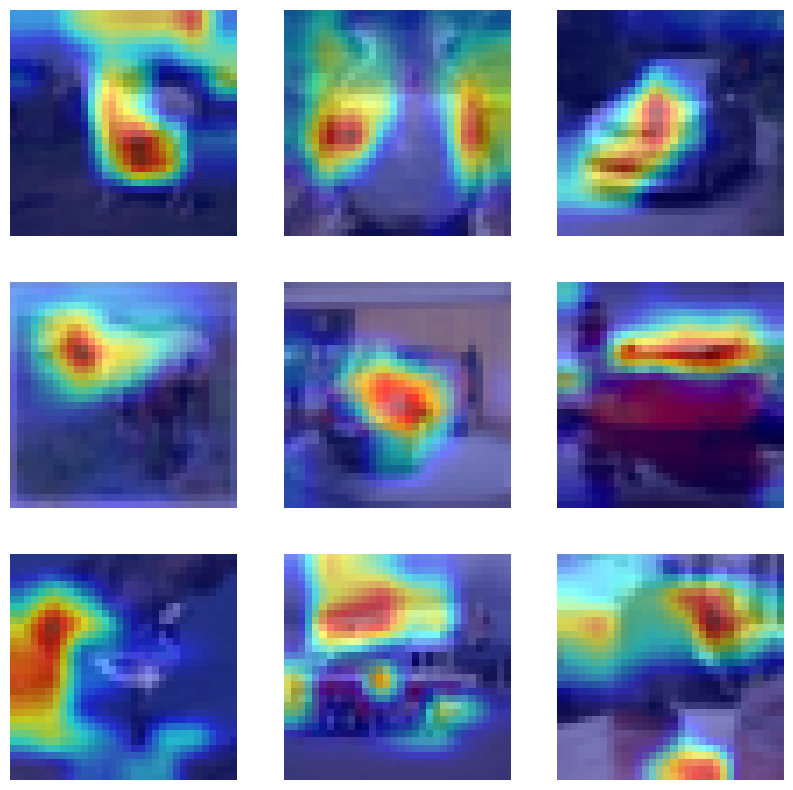

In [121]:
misclassified(model, device, test_loader)